# Overview 

This analysis is based on Avito Challenge's dataset from Kaggle's competition. 
https://www.kaggle.com/c/avito-demand-prediction/data <br>
The whole dataset includes the detailed information of online ads and this analysis focuses on the basic training dataset with a size of nearly 1 GB. The following parts are covered:<br>
1.Glimpse of data: Overview of tables<br>
2.Data Preparation: <br>
 2.1 Cleaning missing data<br>
 2.2 Encoding Categorical data<br>
3.Data Exploration: <br>
 3.1 Histogram and distribution of Deal Probability with Multiple Parent Categories<br>
 3.2 Mean Deal Probability by Dates<br>
 3.3 Pie Chart of Item Descriptions' wordcount by Parent Categories<br>
 3.4 WordCloud of Item Descriptions<br>
4.Regression Model<br>
 4.1 Linear Regression<br>
 4.2 Regularization with Ridge, Lasso and ElasticNetCV<br>
5.Conclusion

# 1.Glimpse of Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from googletrans import Translator
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.offline.init_notebook_mode(connected=True)
%matplotlib inline

In [4]:
train=pd.read_csv('train_avito.csv')

In [4]:
train.head(5)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


In [5]:
# Numeric variables
train.describe()

,price,item_seq_number,image_top_1,deal_probability
count,1.418062e+06,1.503424e+06,1.390836e+06,1.503424e+06
mean,3.167081e+05,7.436740e+02,1.241932e+03,1.391306e-01
std,6.689154e+07,5.572522e+03,9.704641e+02,2.600785e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+02,9.000000e+00,4.250000e+02,0.000000e+00
50%,1.300000e+03,2.900000e+01,1.057000e+03,0.000000e+00
75%,7.000000e+03,8.800000e+01,2.217000e+03,1.508700e-01
max,7.950101e+10,2.044290e+05,3.066000e+03,1.000000e+00


In [6]:
# Categorical variables
train.describe(include='O')

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,activation_date,user_type,image
count,1503424,1503424,1503424,1503424,1503424,1503424,1441848,848882,640859,1503424,1387148,1503424,1503424,1390836
unique,1503424,771769,28,1733,9,47,371,271,1219,788377,1317102,21,3,1390836
top,58c0a763be52,45ba3f23bf25,Краснодарский край,Краснодар,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Обувь,Вторичка,Платье,В хорошем состоянии,2017-03-20,Private,56d7a4e6d39fb3f269f9f107581abb6effa580773d99d6...
freq,1,1080,141416,63638,697623,282753,226289,150450,50615,15550,2249,115190,1075706,1


# 2.Data Preparation:

2.1 Cleaning missing values

In [7]:
# Summary of missing values
train.apply(lambda x: 100*(sum(x.isnull())/len(x)), axis=0)

item_id                  0.000000
user_id                  0.000000
region                   0.000000
city                     0.000000
parent_category_name     0.000000
category_name            0.000000
param_1                  4.095718
param_2                 43.536753
param_3                 57.373369
title                    0.000000
description              7.734079
price                    5.677839
item_seq_number          0.000000
activation_date          0.000000
user_type                0.000000
image                    7.488772
image_top_1              7.488772
deal_probability         0.000000
dtype: float64

In [5]:
# Drop the columns that have nearly 50% missing values and rows that have missing values
data1=train.drop(columns=['param_2', 'param_3'])
data2=data1.dropna(axis=0)

2.2 Encoding Categorical Features

In [10]:
cat=data2[['region', 'parent_category_name', 'user_type']]
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
catlab=cat.apply(LabelEncoder().fit_transform)
catohe=OneHotEncoder().fit_transform(catlab).toarray()
print(catlab.shape)
print(catohe.shape)

(1173123, 3)
(1173123, 40)


In [11]:
data3=pd.DataFrame(np.column_stack([catohe, data2.price, data2.activation_date, data2.deal_probability]))

In [12]:
data4=data3.drop(columns=[41])

# 3.Data Exploration: 
3.1 Histogram and distribution of Deal Probability with Multiple Parent Categories


C:\Users\pengq\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\pengq\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



Text(0.5,1,'Side-by-Side Histogram of Deal Probability with Multiple Parent Categories')

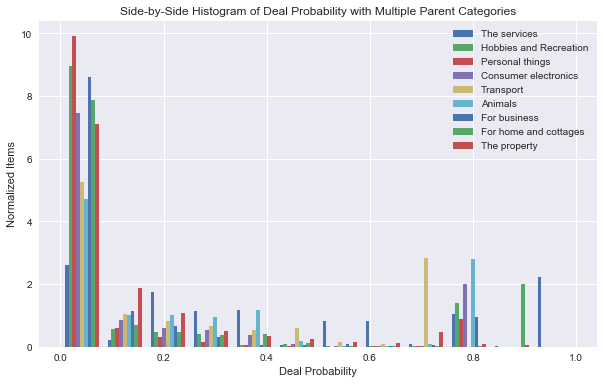

In [229]:
#Side-by-Side Histogram of Deal Probability with Multiple Parent Categories
from googletrans import Translator
p_cat=list(set(data2.parent_category_name))
p_caten=[Translator().translate(i).text for i in p_cat]
parent=[]
for i in range(len(p_cat)):
    globals()['x%s'%i]=data2[data2.parent_category_name==p_cat[i]].deal_probability
    parent.append(globals()['x%s'%i])
fig=plt.figure(figsize=(10,6))         
#plt.hist([x0, x1, x2, x3, x4, x5, x6, x7, x8], bins = int(180/15), normed=True, label=p_caten)
plt.hist(parent, bins = int(180/15), normed=True, label=p_caten)
plt.legend()
plt.xlabel('Deal Probability')
plt.ylabel('Normalized Items')
plt.title('Side-by-Side Histogram of Deal Probability with Multiple Parent Categories')

3.2 Mean Deal Probability by Dates

C:\Users\pengq\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\pengq\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\pengq\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

Text(0.5,1,'Distribution of Mean Deal_probability for Each Month 2017/03-04')

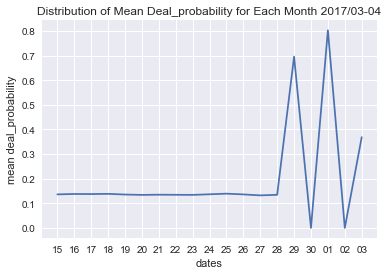

In [322]:
# Deal probability distribution based on months
data5=data2
data5['year']=[i[:4] for i in data5.activation_date]
data5['month']=[i[5:7] for i in data5.activation_date]
data5['day']=[i[8:10] for i in data5.activation_date]
labels=[i[1] for i in data5.groupby(['month', 'day']).mean().index]
plt.plot(labels, list(data5.groupby(['month', 'day']).mean().deal_probability))
plt.xlabel('dates')
plt.ylabel('mean deal_probability')
plt.title('Distribution of Mean Deal_probability for Each Month 2017/03-04')

3.3 Pie Chart of Item Descriptions' wordcount by Parent Categories

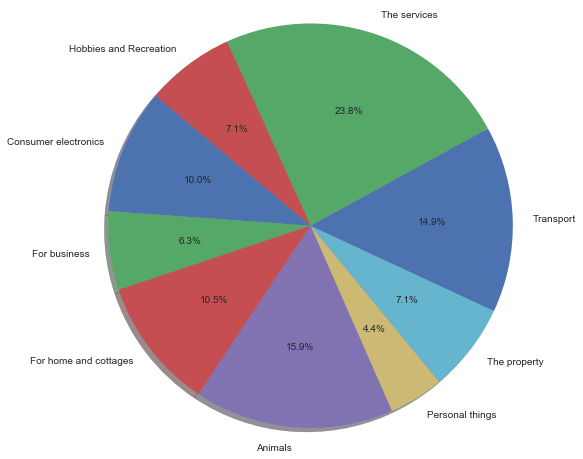

In [7]:
wordcount=[len(i.split()) for i in data2.description]
wd=pd.DataFrame(np.column_stack([wordcount, data2.parent_category_name, data2.deal_probability.astype('float64')]), columns=['desc_word_count', 'p_cat_name', 'deal_probability'])
wd.deal_probability=wd.deal_probability.astype('float64')
wd.desc_word_count=wd.desc_word_count.astype('int64')
from googletrans import Translator

translator=Translator()
labels = [translator.translate(i).text for i in wd.groupby('p_cat_name').mean().index]
values = [i for i in wd.groupby('p_cat_name').mean().deal_probability]

# Plot
fig=plt.figure(figsize=(8,8))
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


3.4 WordCloud of Item Descriptions 

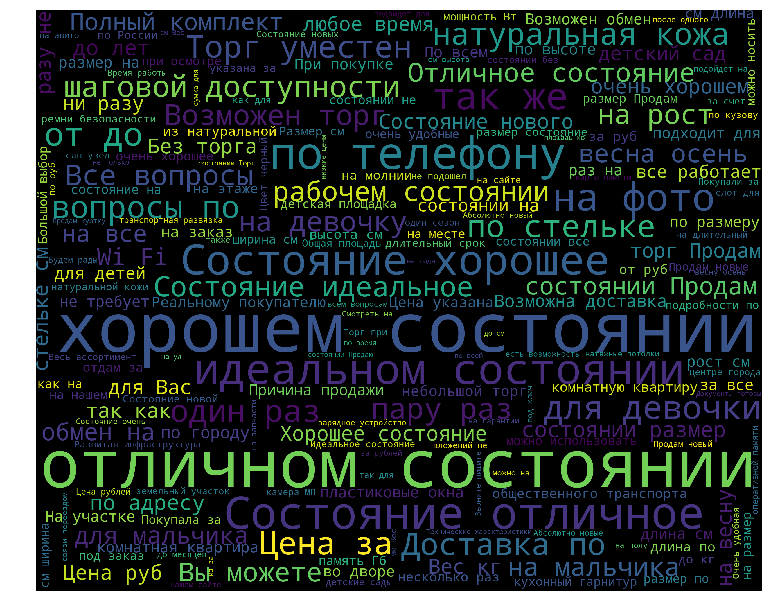

In [152]:
from wordcloud import WordCloud, STOPWORDS
words=' '.join(data2.description)
#cleaned_word=' '.join([word for word in words.split()\
#if 'http' not in word and not word.startswith('@')\
#and not word.startswith('#')\
#and word != 'RT'])
wordcloud=WordCloud(stopwords=STOPWORDS, background_color='black',width=2500, height=2000).generate(words)
plt.figure(1, figsize=(13,13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 4.Regression Model

In this part I fit the data into 4 models: Least Square Regression, Ridge Regression, Lasso Regression and ElasticNet. I used 5 fold cross-validation to select the parameter and R squared from both training and testing datasets to compair model performances

4.1 Linear Regression

In [13]:
X=data4.iloc[:,:-1]
y=data4.iloc[:,-1]

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [463]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train, y_train)
linear.score(X_train, y_train)

0.5713160823878938

4.2 Regularization with Ridge, Lasso and ElasticNetCV

In [331]:
rscore_train_ela=[]
rscore_test_ela=[]
mse_ela=[]
lam_ela=[]
coef_ela=[]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
for i in range(10):
    X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=X.shape[1]*2)
    model=ElasticNetCV(cv=5)
    model.fit(X_train, y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    score_train=1-(sum((y_train-y_pred_train)**2)/len(y_train))/(sum((y-np.mean(y))**2)/len(y))
    score_test=1-(sum((y_test-y_pred_test)**2)/len(y_test))/(sum((y-np.mean(y))**2)/len(y))
    mse=mean_squared_error(y_test, y_pred_test)
    # Append the values to lists
    rscore_train_ela.append(score_train)
    rscore_test_ela.append(score_test)
    mse_ela.append(mse)
    lam_ela.append(model.alpha_)
    coef_ela.append(model.coef_)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn

In [360]:
rscore_train_lasso=[]
rscore_test_lasso=[]
mse_lasso=[]
lam_lasso=[]
coef_lasso=[]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
for i in range(10):
    X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=X.shape[1]*2)
    lasso=LassoCV(cv=5)
    lasso.fit(X_train, y_train)
    y_pred_train=lasso.predict(X_train)
    y_pred_test=lasso.predict(X_test)
    score_train=1-(sum((y_train-y_pred_train)**2)/len(y_train))/(sum((y-np.mean(y))**2)/len(y))
    score_test=1-(sum((y_test-y_pred_test)**2)/len(y_test))/(sum((y-np.mean(y))**2)/len(y))
    mse=mean_squared_error(y_test, y_pred_test)
    # Append the values to lists
    rscore_train_lasso.append(score_train)
    rscore_test_lasso.append(score_test)
    mse_lasso.append(mse)
    lam_lasso.append(lasso.alpha_)
    coef_lasso.append(lasso.coef_)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn

In [370]:
rscore_train_ridge=[]
rscore_test_ridge=[]
mse_ridge=[]
lam_ridge=[]
coef_ridge=[]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
for i in range(10):
    X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=X.shape[1]*2)
    ridge=ElasticNetCV(cv=5, l1_ratio=0.01)
    ridge.fit(X_train, y_train)
    y_pred_train=ridge.predict(X_train)
    y_pred_test=ridge.predict(X_test)
    score_train=1-(sum((y_train-y_pred_train)**2)/len(y_train))/(sum((y-np.mean(y))**2)/len(y))
    score_test=1-(sum((y_test-y_pred_test)**2)/len(y_test))/(sum((y-np.mean(y))**2)/len(y))
    mse=mean_squared_error(y_test, y_pred_test)
    # Append the values to lists
    rscore_train_ridge.append(score_train)
    rscore_test_ridge.append(score_test)
    mse_ridge.append(mse)
    lam_ridge.append(ridge.alpha_)
    coef_ridge.append(ridge.coef_)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn

Selected Alphas:
ElasticNet:133.051634
Lasso:5.739194
Ridge:2485.876684


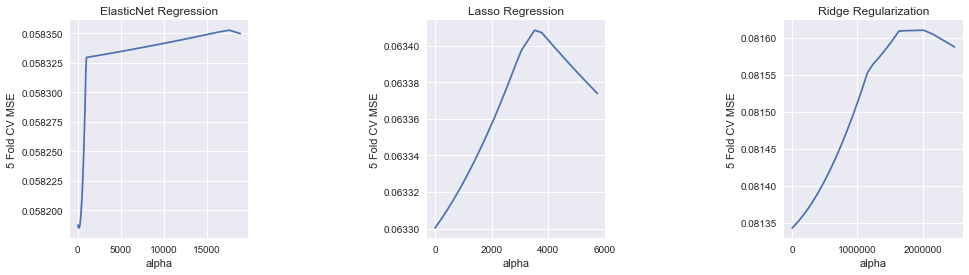

In [467]:
# Model Selection Using 5 Fold Cross-validation - Comparisons of CV MSE between ElasticNet, Lasso and Ridge
fig=plt.figure(figsize=(16,4))
plt.subplots_adjust(wspace=1)
ax1=fig.add_subplot(131)
mse_path_ela=[np.mean(i) for i in model.mse_path_]
mse_alpha_ela=[i for i in model.alphas_]
ax1.plot(mse_alpha_ela, mse_path_ela)
ax1.set_title('ElasticNet Regression')
ax1.set_xlabel('alpha')
ax1.set_ylabel('5 Fold CV MSE')

ax2=fig.add_subplot(132)
mse_path_lasso=[np.mean(i) for i in lasso.mse_path_]
mse_alpha_lasso=[i for i in lasso.alphas_]
ax2.plot(mse_alpha_lasso, mse_path_lasso)
ax2.set_title('Lasso Regression')
ax2.set_xlabel('alpha')
ax2.set_ylabel('5 Fold CV MSE')

ax3=fig.add_subplot(133)
mse_path_ridge=[np.mean(i) for i in ridge.mse_path_]
mse_alpha_ridge=[i for i in ridge.alphas_]
ax3.plot(mse_alpha_ridge, mse_path_ridge)
ax3.set_title('Ridge Regularization')
ax3.set_xlabel('alpha')
ax3.set_ylabel('5 Fold CV MSE')

print ('Selected Alphas:')
print ('ElasticNet:%f'% mse_alpha_ela[np.argmin(mse_path_ela)])
print ('Lasso:%f'% mse_alpha_lasso[np.argmin(mse_path_lasso)])
print ('Ridge:%f'% mse_alpha_ridge[np.argmin(mse_path_ridge)])

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



Elastic-Train R:0.134742 Test R:-0.029885
Lasso-Train R:0.070188 Test R:-0.087100
Ridge-Train R:-0.065118 Test R:-0.016829


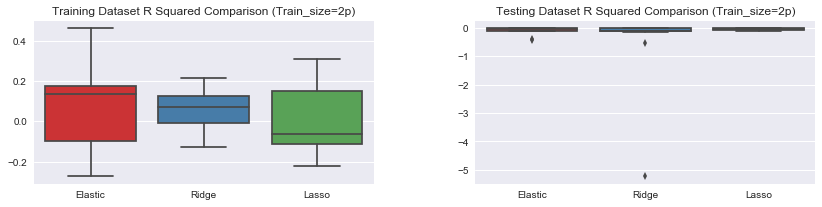

In [471]:
# Model Selection Using 5 Fold Cross-validation - Comparisons of Training and Testing R squared 
# between ElasticNet, Lasso and Ridge

c=pd.DataFrame(np.column_stack([rscore_train_ela, rscore_train_lasso, rscore_train_ridge]), columns=['Elastic','Ridge', 'Lasso'])
d=pd.DataFrame(np.column_stack([rscore_test_ela, rscore_test_lasso, rscore_test_ridge]), columns=['Elastic','Ridge', 'Lasso'])
fig=plt.figure(figsize=(14,3))
plt.subplots_adjust(wspace=0.3)
ax1=fig.add_subplot(121)
ax1=sns.boxplot(data=c, orient='v', palette='Set1')
ax1.set_title('Training Dataset R Squared Comparison (Train_size=2p)')
ax2=fig.add_subplot(122)
ax2=sns.boxplot(data=d, orient='v', palette='Set1')
ax2.set_title('Testing Dataset R Squared Comparison (Train_size=2p)')

print('Elastic-Train R:%f'% np.median(rscore_train_ela), 'Test R:%f'% np.median(rscore_test_ela))
print('Lasso-Train R:%f'% np.median(rscore_train_lasso), 'Test R:%f'% np.median(rscore_test_lasso))
print('Ridge-Train R:%f'% np.median(rscore_train_ridge), 'Test R:%f'% np.median(rscore_test_ridge))

# 5.Conclusion

Throughout this analysis, I started from understanding the distribution of target variables using EDA to fitting the data into the linear regression and regularization models which returned pretty good mean squared errors and R squared values. This shows the viability of applying the same techniques to Ebay's dataset through webscrapping with rich information covering all the features in this dataset. (For example on Ebay's website, the 'More than % are sold' data can be derived to become the response variable, and corresponding predictors including shipping, customer satisfactory level, response rate can be used as independent variables) However as this is just a basic analysis, it needs to be further improved to deal with more complex data.<br>

My plan for improving the model during the bootcamp is as follows:<br>
1.Build up models that can incorporate image and NLP information to better predict the deal probability<br>
2.As this dataset is quite large, I would try to use Pyspark to accelerate the efficiency of processing data<br>
3.I would create a web app on Heroku to realize business application of the model<br>

Thanks for reading!